# E-commerse Product Categorization

# Problem Statement

in the era of e-commerce and retail, the biggest challenge is to tag a particulary product to it's category. There are billions of items, and manually tagging is an inefficient task and cost to a company. It must be done intelligently and fast. New items are added to the website or store every day and detectign the category is critical. Machine learning and natural language processing come to the rescue to solve this problem and save a lot of time and money.

In this project, i build a predictive model and categorize products in an e-commerse data set. Product categorization is a supervised classification problem where the product categories are the target classes, and the features are the words extracted from the product description or an image

The aim is to successfully classify product categories with high precision using state of the art machine learning and deep elarning techniques.


In [236]:
# Data manipulation
from tensorflow.keras.layers import (
    Dense,
    Embedding,
    Flatten,
    GRU,
    Bidirectional,
    LSTM,
    GlobalAveragePooling1D,
)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
import tensorflow as tf


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# from tensorflow.keras.layers import (
#     Input,
#     Dense,
#     Dropout,
#     Embedding,
#     LSTM,
#     Flatten,
#     Conv1D,
#     MaxPooling1D,
# )
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers


import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from imblearn.over_sampling import SMOTE

# Exploratory data Analysis </br> the data has 20,000 rows and 15 columns

The dataset provides comprehensive product details from Flipkart, one of India's leading e-commerce platforms, for the year 2017. it offers valuable insights into the e-commerce landscape of the time, capturing a wide array of product information access various categories </br>

sample source: https://data.world/promptcloud/product-details-on-flipkart-com </br>
original dataset: https://app.datastock.shop/?site%5C_name=Flipkart%5C_Product%5C_Listings
</br>
the data set description:</br>
Key Features:
Product Information: Detailed descriptions, specifications, and features for thousands of products.
Pricing Data: Includes original prices, discounts, and final sale prices to understand pricing strategies.
Category Coverage: A wide range of product categories, including electronics, fashion, home appliances, books, and more.
Customer Reviews and Ratings: Aggregated customer feedback to assess product popularity and customer satisfaction.
Seller Information: Data about various sellers, providing insights into market competition and seller performance.


In [237]:
# I will first read the contents of the uploaded CSV file to understand its structure
import pandas as pd

# Load the dataset from the provided file path
file_path = "ecommerce.csv"
data = pd.read_csv(file_path)

# Display the first few rows and column names to understand its structure
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

/tmp/ipykernel_96237/1850671707.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 

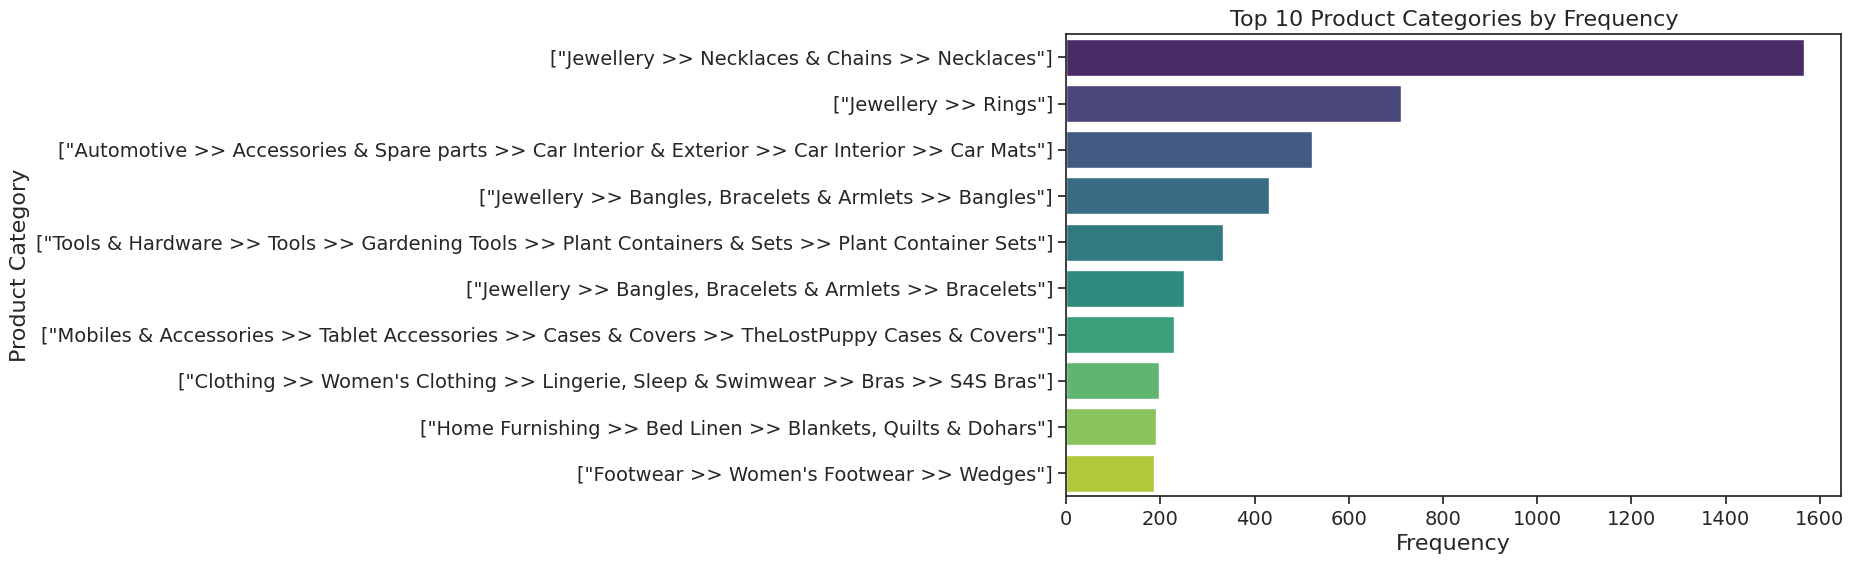

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of product categories
category_counts = (
    data["product_category_tree"].value_counts().head(10)
)  # Top 10 categories for better visualization

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title("Top 10 Product Categories by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Product Category")
plt.show()

#### The e-commerce data set has 15 attributes; out of these columns, i will only extract the following for further analysis: </br> 1. description </br> 2. product_category_tree. </br> The remaining columns are not important for the text classification model.


### checking the number of classes. notice the classes have sub-categories which i will not worry about for now. i will get rid of them in preprocessing and only keep the main classes


In [240]:
# checking the number of classes
data["product_category_tree"].value_counts()

product_category_tree
["Jewellery >> Necklaces & Chains >> Necklaces"]                                                                                                                1567
["Jewellery >> Rings"]                                                                                                                                           710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]                                                               522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                                                                         430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]                                                              332
                                                                                                                                                         

## Preprocessing


### Dropping all columns and only selecting the description and the product_category_tree


In [ ]:
# Dropping rows with missing descriptions
prod_cat_data = data[["description", "product_category_tree"]]
# prod_cat_data.head()
prod_cat_data = prod_cat_data.dropna()

# Cleaning 'description' by removing any unwanted characters, making it lowercase, etc.


def clean_text(text):
    # Remove special characters, URLs, and numbers
    text = re.sub(r"http\S+|[^A-Za-z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    return text


def clean_desc(text):
    # Remove punctuation
    text = tf.strings.regex_replace(text, "[^\\w\\d\\s]", " ")

    # # Replace whitespace between terms with a single space
    text = tf.strings.regex_replace(text, "\\s+", " ")

    # Remove leading and trailing whitespace
    text = tf.strings.strip(text)

    # converting to lower case
    text = tf.strings.lower(text)
    # Prod_cat_data["description"] = Prod_cat_data["description"].str.lower()

    # Replace numbers like price values with 'numbr'
    text = tf.strings.regex_replace(text, "\\d+(\\.\\d+)?", "numbr")

    return text.numpy().decode()


def clean_label(label):
    # print(prod_cat_data["product_category_tree"][1])

    # label = tf.strings.strip(label, " ")

    label = label.split(">>")[0]
    label = tf.strings.regex_replace(label, "[^\\w\\s&]", " ")

    return label.numpy().decode().lower().strip()


prod_cat_data["description"] = prod_cat_data["description"].apply(
    lambda x: clean_desc(x)
)

prod_cat_data["product_category_tree"] = prod_cat_data["product_category_tree"].apply(
    lambda x: clean_label(x)
)


prod_cat_data.head()

In [7]:
prod_cat_data["product_category_tree"].value_counts()
# for label in prod_cat_data["product_category_tree"].unique():
#     print(label)

product_category_tree
clothing                                           6197
jewellery                                          3531
footwear                                           1227
mobiles & accessories                              1099
automotive                                         1012
                                                   ... 
mast & harbour gold synthetic  clutch                 1
asics gel cumulus 17 running shoes                    1
glacier running shoes                                 1
starsy solid women s round neck green t shirt         1
areon luxurious fragrance long lasting car home       1
Name: count, Length: 265, dtype: int64

#### Plotting the product category distribution to visualize and understand better


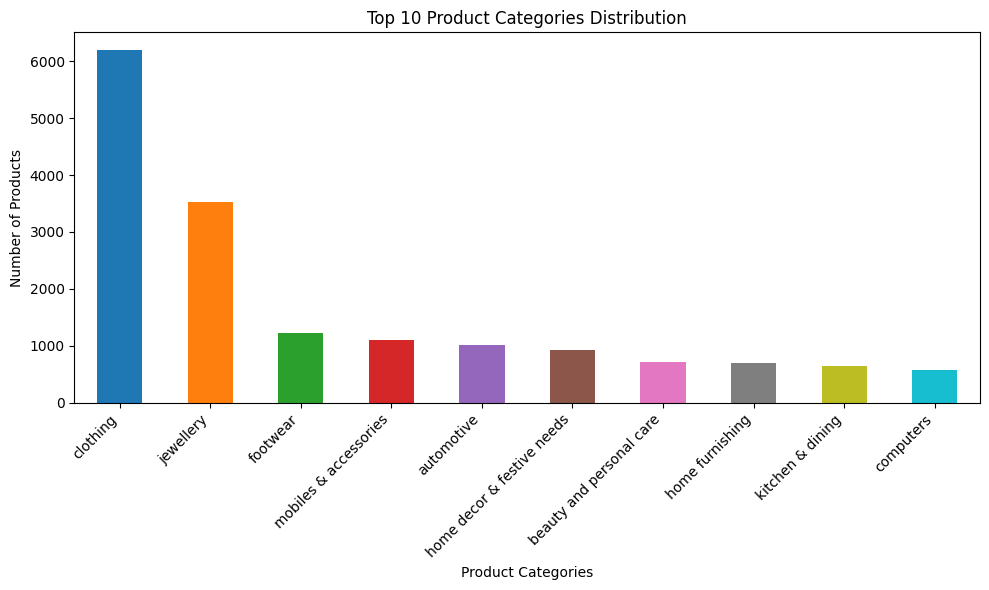

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_categories = prod_cat_data["product_category_tree"].value_counts().nlargest(10)

# Plotting the top 10 categories
fig, ax = plt.subplots(figsize=(10, 6))  # Set the figure size
top_10_categories.plot(
    ax=ax,
    kind="bar",
    color=sns.color_palette("tab10"),
    title="Top 10 Product Categories Distribution",
)
plt.xlabel("Product Categories")  # X-axis label
plt.ylabel("Number of Products")  # Y-axis label
plt.xticks(rotation=45, ha="right")  # Rotate category labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

In [9]:
# Number of missing values in each column
missing = pd.DataFrame(prod_cat_data.isnull().sum()).rename(columns={0: "missing"})
# Create a percentage of missing values
missing["percent"] = missing["missing"] / len(prod_cat_data)
# sorting the values in descending order to see highest count on the top
missing.sort_values("percent", ascending=False)

,missing,percent
description,0,0.0
product_category_tree,0,0.0


/tmp/ipykernel_96237/1116808091.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod_cat_data.groupby("bins")


Text(0.5, 1.0, 'Word distribution per bin')

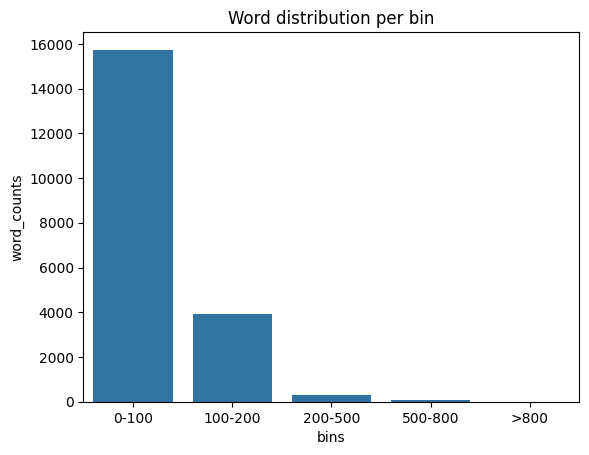

In [10]:
prod_cat_data["no_of_words"] = prod_cat_data.description.apply(lambda a: len(a.split()))
bins = [0, 50, 75, np.inf]
prod_cat_data["bins"] = pd.cut(
    prod_cat_data.no_of_words,
    bins=[0, 100, 300, 500, 800, np.inf],
    labels=["0-100", "100-200", "200-500", "500-800", ">800"],
)

words_distribution = (
    prod_cat_data.groupby("bins")
    .size()
    .reset_index()
    .rename(columns={0: "word_counts"})
)
sns.barplot(x="bins", y="word_counts", data=words_distribution).set_title(
    "Word distribution per bin"
)

### Most of the descriptions have fewer than 200 words. And more than 80% contains fewer than 100 words.


In [11]:
prod_cat_data["description"][4]

'specifications of sicons all purpose arnica dog shampoo numbr ml general pet type dog brand sicons quantity numbr ml model number sh df numbr type all purpose fragrance arnica form factor liquid in the box sales package shampoo sicons dog fashion arnica'

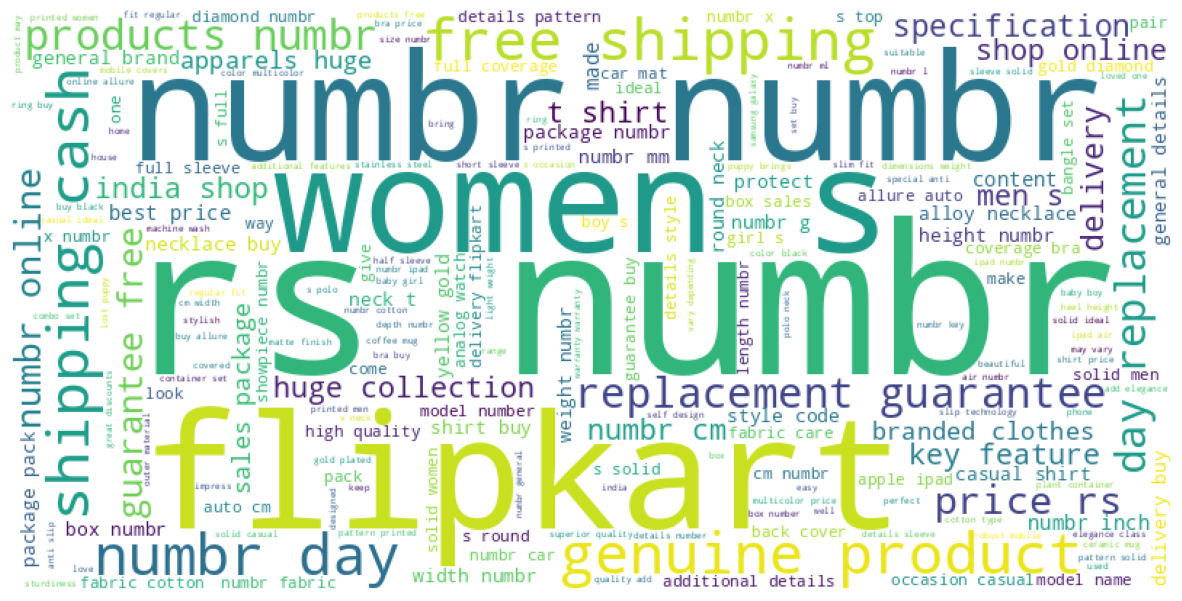

In [12]:
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    " ".join(prod_cat_data["description"])
)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

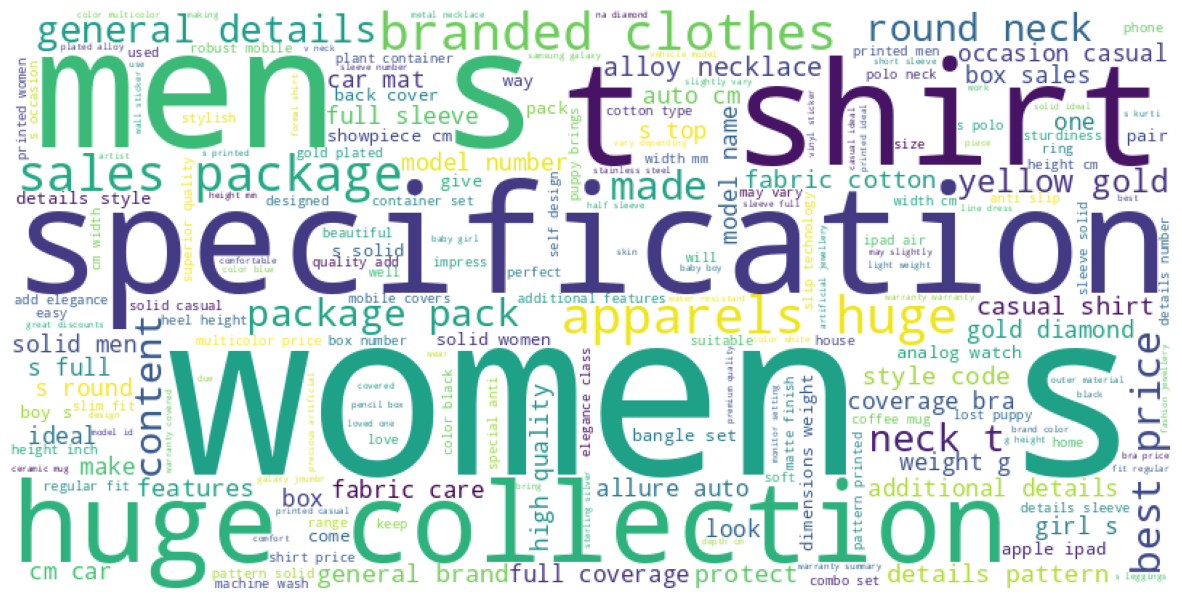

In [13]:
specific_stop_words = [
    "numbr",
    "rs",
    "flipkart",
    "buy",
    "com",
    "free",
    "day",
    "cash",
    "replacement",
    "guarantee",
    "genuine",
    "key",
    "feature",
    "delivery",
    "products",
    "product",
    "shipping",
    "online",
    "india",
    "shop",
]
prod_cat_data["description"] = prod_cat_data["description"].apply(
    lambda a: " ".join(a for a in a.split() if a not in specific_stop_words)
)

wordcloud = WordCloud(background_color="white", width=800, height=400).generate(
    " ".join(prod_cat_data["description"])
)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
MAX_LENGTH = 200
vocab_size = 16000

In [15]:
prod_tok = Tokenizer()
prod_tok.fit_on_texts(prod_cat_data["description"])
clean_description = prod_tok.texts_to_sequences(prod_cat_data["description"])
# padding
X = pad_sequences(clean_description, maxlen=MAX_LENGTH)

## Encoding labels


In [16]:
# Label encoder for Target variable
from sklearn.preprocessing import LabelEncoder

num_classes = len(np.unique(prod_cat_data.product_category_tree.values))
y = prod_cat_data["product_category_tree"].values
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# Train test split


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)  # train 80, test 20
print(X.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19998, 200)
(15998,)
(4000, 200)
(4000,)


# Model Building


In [18]:
# FFNN Model for multi-class classification
def create_ffnn_model():
    model = Sequential(
        [
            Embedding(vocab_size, 128, input_length=MAX_LENGTH),
            Flatten(),
            Dense(128, activation="relu"),
            Dense(len(np.unique(y)), activation="softmax"),
        ]
    )
    return model


# GRU Model for multi-class classification
def create_gru_model():
    model = Sequential(
        [
            Embedding(vocab_size, 128, input_length=MAX_LENGTH),
            GRU(128),
            Dense(128, activation="relu"),
            Dense(len(np.unique(y)), activation="softmax"),
        ]
    )
    return model


# Bidirectional LSTM Model for multi-class classification
def create_bidirectional_lstm_model():
    model = Sequential(
        [
            Embedding(vocab_size, 128, input_length=MAX_LENGTH),
            Bidirectional(LSTM(128)),
            Dense(128, activation="relu"),
            Dense(len(np.unique(y)), activation="softmax"),
        ]
    )
    return model

In [19]:
# Function to train and evaluate models for multi-class classification
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
from tensorflow.keras.callbacks import EarlyStopping


optimizers = ["SGD", "Adam", "Adagrad"]

early_stopping = EarlyStopping(monitor="val_loss", patience=3)


def train_and_evaluate(model_fn, optimizer_name, epochs=1):
    model = model_fn
    optimizer = optimizer_name
    model.compile(
        optimizer=f"{optimizer}",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    # Train model
    history = model.fit(
        X_train,
        y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping],
    )

    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test accuracy with {optimizer_name}: {test_acc:.4f}")

    return history


# Define the models
models = {
    "FFNN": {
        "model": create_ffnn_model(),
        "hist": {
            "sgd": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
            "adam": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
            "adagrad": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
        },
    },
    "GRU": {
        "model": create_gru_model(),
        "hist": {
            "sgd": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
            "adam": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
            "adagrad": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
        },
    },
    "Bidirectional_LSTM": {
        "model": create_bidirectional_lstm_model(),
        "hist": {
            "sgd": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
            "adam": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
            "adagrad": {"acc": [], "loss": [], "val_loss": [], "val_acc": []},
        },
    },
}

# models['FFNN']['model'].summary()
for model_name, model in models.items():
    models[model_name]["model"].summary()

/home/mbeleck/anaconda3/envs/tf2-cuda/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train all models with each optimizer
num_epochs = 15
for model_name, model in models.items():
    for optimizer_name in optimizers:
        print(f"\nTraining {model_name} with {optimizer_name}")
        history = train_and_evaluate(
            models[model_name]["model"], optimizer_name, num_epochs
        )
        models[model_name]["hist"][optimizer_name.lower()]["acc"] = history.history[
            "accuracy"
        ]
        models[model_name]["hist"][optimizer_name.lower()]["loss"] = history.history[
            "loss"
        ]
        models[model_name]["hist"][optimizer_name.lower()]["val_acc"] = history.history[
            "val_accuracy"
        ]
        models[model_name]["hist"][optimizer_name.lower()]["val_loss"] = (
            history.history["val_loss"]
        )


Training FFNN with SGD
Epoch 1/5


I0000 00:00:1728190300.663159   96365 service.cc:146] XLA service 0x7fd624017d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728190300.663229   96365 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-10-06 00:51:40.672851: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-06 00:51:40.705991: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 13/400 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1871 - loss: 5.5522

I0000 00:00:1728190303.411546   96365 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


398/400 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3268 - loss: 4.0089

2024-10-06 00:51:49.879673: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_172', 4 bytes spill stores, 4 bytes spill loads



400/400 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.3272 - loss: 4.0026 - val_accuracy: 0.4041 - val_loss: 2.5071
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4136 - loss: 2.4700 - val_accuracy: 0.4244 - val_loss: 2.3844
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4453 - loss: 2.3063 - val_accuracy: 0.4553 - val_loss: 2.2349
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4701 - loss: 2.1761 - val_accuracy: 0.5138 - val_loss: 2.1110
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.4984 - loss: 2.0427 - val_accuracy: 0.5003 - val_loss: 1.9942
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5093 - loss: 2.0546
Test accuracy with SGD: 0.5105

Training FFNN with Adam
Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6625 - loss: 1.5307 - val_accuracy: 0.9172 - val_loss: 0.4482
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9567 - loss: 0.2334 - val_accuracy: 0.9344 - v

In [21]:
models["FFNN"]["hist"]

{'sgd': {'acc': [0.36872950196266174,
   0.42467573285102844,
   0.44756993651390076,
   0.4755430519580841,
   0.5016408562660217],
  'loss': [3.1626977920532227,
   2.4125442504882812,
   2.2772350311279297,
   2.1539154052734375,
   2.0416128635406494],
  'val_loss': [2.5070977210998535,
   2.3844194412231445,
   2.2348644733428955,
   2.1110048294067383,
   1.9942108392715454],
  'val_acc': [0.40406250953674316,
   0.4243749976158142,
   0.45531249046325684,
   0.5137500166893005,
   0.5003125071525574]},
 'adam': {'acc': [0.7866072654724121,
   0.9585872888565063,
   0.9785904288291931,
   0.9867166876792908,
   0.9914048910140991],
  'loss': [0.9663752317428589,
   0.22665099799633026,
   0.09613591432571411,
   0.05556211248040199,
   0.03488495945930481],
  'val_loss': [0.4482291042804718,
   0.3785177171230316,
   0.39392462372779846,
   0.3970443606376648,
   0.45464637875556946],
  'val_acc': [0.917187511920929,
   0.934374988079071,
   0.9340624809265137,
   0.9359375238418

# comparisons


In [169]:
models["FFNN"]["hist"]["sgd"]["loss"]

[3.1626977920532227,
 2.4125442504882812,
 2.2772350311279297,
 2.1539154052734375,
 2.0416128635406494]

# SGD


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

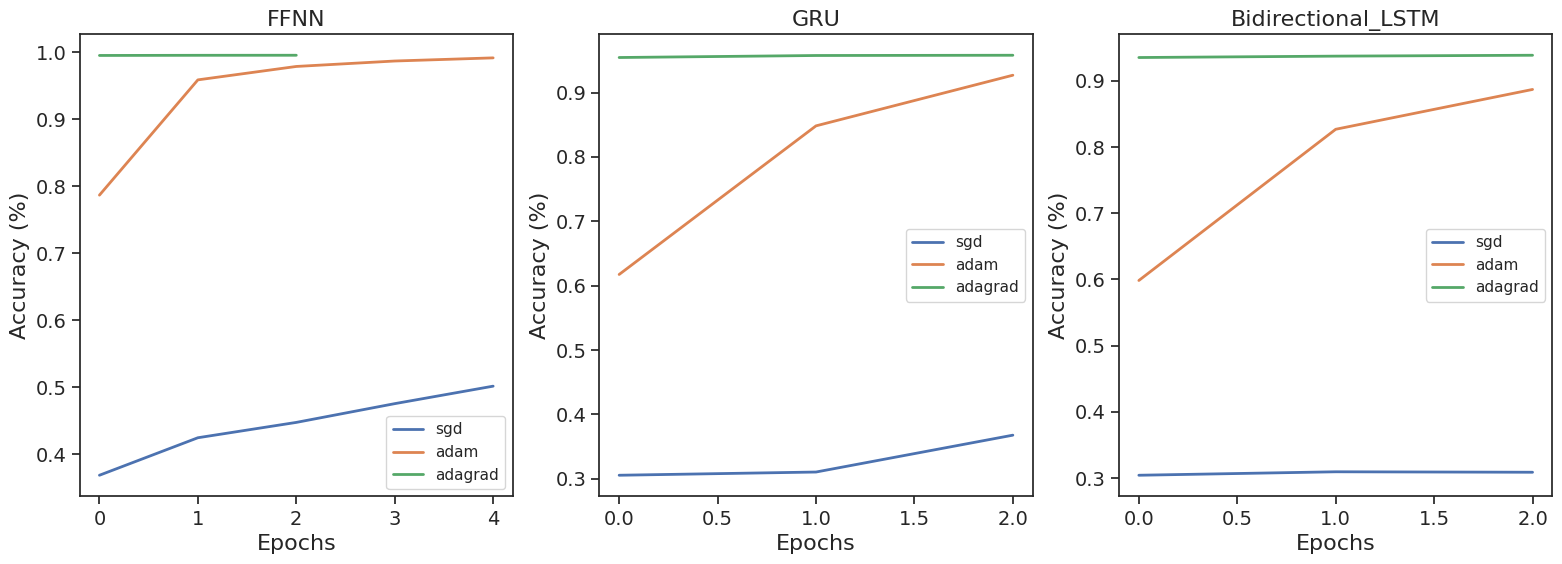

In [235]:
ffnn_sgd_acc = models["FFNN"]["hist"]["sgd"]["acc"]
ffnn_adam_acc = models["FFNN"]["hist"]["adam"]["acc"]
ffnn_adagrad_acc = models["FFNN"]["hist"]["adagrad"]["acc"]

y0 = [ffnn_sgd_acc, ffnn_adam_acc, ffnn_adagrad_acc]

# fig, ax = plt.subplots(figsize=(6, 5))
labels = ["sgd", "adam", "adagrad"]

# Plot the baseline
fig, ax = plt.subplots(1, 3, figsize=(19, 6))

# Define a nice color palette:
# colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax[0].plot(y0[i], label=label, linewidth=2)
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy (%)")
    ax[0].set_title("FFNN")
    ax[0].legend()


gru_sgd_acc = models["GRU"]["hist"]["sgd"]["acc"]
gru_adam_acc = models["GRU"]["hist"]["adam"]["acc"]
gru_adagrad_acc = models["GRU"]["hist"]["adagrad"]["acc"]

y1 = [gru_sgd_acc, gru_adam_acc, gru_adagrad_acc]

# fig, ax = plt.subplots(figsize=(6, 5))
labels = ["sgd", "adam", "adagrad"]


# Define a nice color palette:
# colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax[1].plot(y1[i], label=label, linewidth=2)

    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Accuracy (%)")
    ax[1].set_title("GRU")
    ax[1].legend()


bid_sgd_acc = models["Bidirectional_LSTM"]["hist"]["sgd"]["acc"]
bid__adam_acc = models["Bidirectional_LSTM"]["hist"]["adam"]["acc"]
bid_adagrad_acc = models["Bidirectional_LSTM"]["hist"]["adagrad"]["acc"]

y1 = [bid_sgd_acc, bid__adam_acc, bid_adagrad_acc]

# fig, ax = plt.subplots(figsize=(6, 5))
labels = ["sgd", "adam", "adagrad"]


# Define a nice color palette:
# colors = ["#2B2F42", "#8D99AE", "#EF233C"]

# Plot each of the main lines
for i, label in enumerate(labels):
    # Line
    ax[2].plot(y1[i], label=label, linewidth=2)

    ax[2].set_xlabel("Epochs")
    ax[2].set_ylabel("Accuracy (%)")
    ax[2].set_title("Bidirectional_LSTM")
    ax[2].legend()
plt.show()


plt.show()